In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [339]:
m = 100
X1 = np.random.rand(m, 1)
X2 = np.random.rand(m, 1)
X1 = np.append(X1, np.random.rand(m, 1)+2)
X2 = np.append(X2, np.random.rand(m, 1)+2)
X1 = np.append(X1, np.random.rand(m, 1)+4)
X2 = np.append(X2, np.random.rand(m, 1)+4)

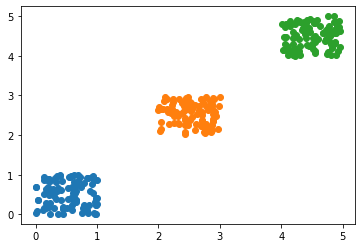

In [340]:
X = np.c_[np.ones(shape=(3*m,1)), X1, X2]
y = np.array([1]*m + [2]*m + [3]*m).reshape(-1, 1)
Y = np.c_[y==1, y==2, y==3].astype(int)

plt.figure()
plt.scatter(X1[:m], X2[:m])
plt.scatter(X1[m:2*m], X2[m:2*m])
plt.scatter(X1[2*m:], X2[2*m:])

In [361]:
from sklearn.model_selection import cross_val_score

In [363]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs")
# softmax_reg.fit(X[:, 1:], y.reshape(-1))
cross_val_score(softmax_reg, X[:, 1:], y.reshape(-1), cv=5)

array([1., 1., 1., 1., 1.])

In [364]:
    softmax_reg.predict([[0.5, 2]])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [353]:
softmax_reg.coef_

array([[-2.32842623, -2.32061575],
       [-0.01536989, -0.03119536],
       [ 2.34379611,  2.35181111]])

In [350]:
dir(softmax_reg)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

D:\ML\Hands On ML\my_env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (1,) and (299,)

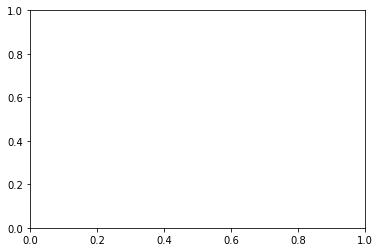

In [333]:
from sklearn.linear_model import LogisticRegression

K = 3
m = len(X)
n = X.shape[1]
alpha = 0.01

idx_shuffle = list(range(m))
np.random.shuffle(idx_shuffle)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs")

X = X[idx_shuffle]
Y = Y[idx_shuffle]
y = y[idx_shuffle]

for i in range(m-1, m):
    Xtemp = X[:i, :]
    # Ytemp = Y[:i, :]
    ytemp = y[:i]
    Theta = np.zeros(shape=(K, n))
      
    softmax_reg.fit(Xtemp[:, 1:], ytemp)
    y_train_predict = softmax_reg.predict(Xtemp[:, 1:])


#     for epoch in range(1000):
    
#         S = np.dot(Xtemp, Theta.T)
#         expS = np.exp(S)
#         P = expS/np.sum(expS, axis=1).reshape(-1, 1)

#         J = -1/m*np.sum(Ytemp*np.log10(P))
#         grad = 1/m*np.dot(Xtemp.T, (P-Ytemp))

#         Theta = Theta - alpha*grad
        
    plt.plot(i, sum(ytemp.reshape(1, -1) != y_train_predict), "b.")

In [337]:
y_train_predict

array([2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 1,
       2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 2, 2, 1, 2, 3,
       2, 3, 2, 1, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 2, 1, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2,
       3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 1, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 1,
       1, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 1,
       2, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3,
       2, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3])

In [319]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [355]:
softmax_reg.coef_

array([[-2.32842623, -2.32061575],
       [-0.01536989, -0.03119536],
       [ 2.34379611,  2.35181111]])

In [298]:
Theta/Theta[0, 0].reshape(-1, 1)

array([[ 1.        , -0.87126899, -0.12873101],
       [-0.5703029 , -3.82711441,  4.39741731],
       [-0.29661061, -3.97241199,  4.2690226 ]])

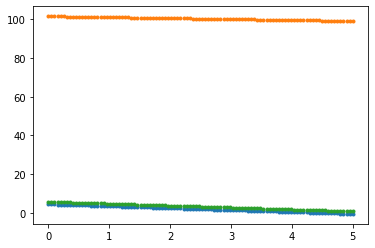

In [357]:
xp = np.linspace(0, 5, 100)
# xx, yy = np.meshgrid(xp, yp)
plt.figure()
for Th in np.c_[softmax_reg.intercept_, softmax_reg.coef_]:
    plt.plot(xp, (-Th[0]-Th[1]*xp)/Th[2], ".")

In [358]:
np.c_[softmax_reg.intercept_, softmax_reg.coef_]

array([[ 10.25749838,  -2.32842623,  -2.32061575],
       [  3.17064681,  -0.01536989,  -0.03119536],
       [-13.42814519,   2.34379611,   2.35181111]])

In [284]:
S = np.dot(X, Theta.T)
expS = np.exp(S)
P = expS/np.sum(expS, axis=1).reshape(-1, 1)
(P >= 0.5).astype(int)

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [290]:
P.max(axis=1)

ValueError: too many values to unpack (expected 2)

In [277]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


In [ ]:
plot_learning_curves(model, X, y)

In [137]:
S = np.linspace(0, 5, 6).reshape(2, 3)

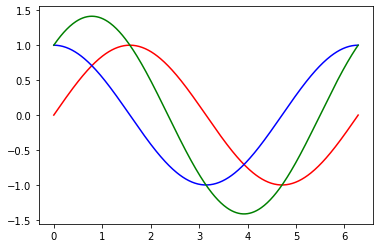

In [204]:
t = np.linspace(0, 2*np.pi, 400)
a = np.sin(t)
b = np.cos(t)
c = a + b

plt.plot(t, a, 'r') # plotting t, a separately 
plt.plot(t, b, 'b') # plotting t, b separately 
plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [138]:
S

array([[0., 1., 2.],
       [3., 4., 5.]])

In [143]:
S/np.sum(S, axis=1).reshape(-1, 1)

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667]])